### Analomy-Detection
##### Analomy Detection is a process of finding the outliers in the data i.e. points that are significantly different from the majority of the other  data points.

In [95]:
### importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from pyod.models.iforest import IForest
from numpy import percentile
import matplotlib

In [96]:
### reading data from csv
## Distribution of the sales
df = pd.read_excel("E:/MyLearnings/My_Projects/Sample - Superstore.xls")
df.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [97]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

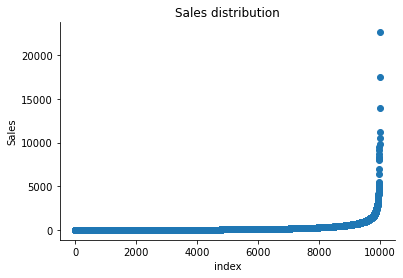

In [98]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution") 
sns.despine()

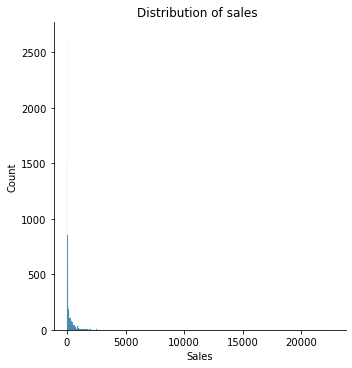

In [99]:
sns.displot(df["Sales"])
plt.title("Distribution of sales ")
sns.despine()

In [100]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

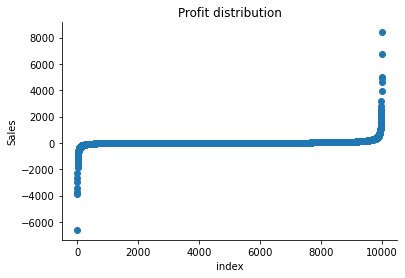

In [101]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Profit distribution")
sns.despine()

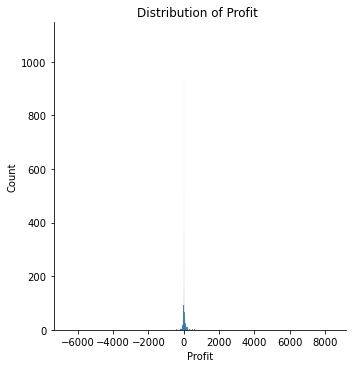

In [102]:
sns.displot(df["Profit"])
plt.title("Distribution of Profit ")
sns.despine()

In [103]:
print("Skewness: %f" %df['Profit'].skew())
print("Kurtosis: %f" %df["Profit"].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


In [104]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1,1))
xx = np.linspace(df["Sales"].min(),df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
# print("Anomaly Score: %f " %anomaly_score)
outlier = isolation_forest.predict(xx)
# print("Outliers: %f" %outlier)   

In [105]:
anomaly_score

array([-0.00597265,  0.04885332,  0.08264675, ..., -0.35357557,
       -0.35357557, -0.35357557])

In [106]:
outlier

array([-1,  1,  1, ..., -1, -1, -1])

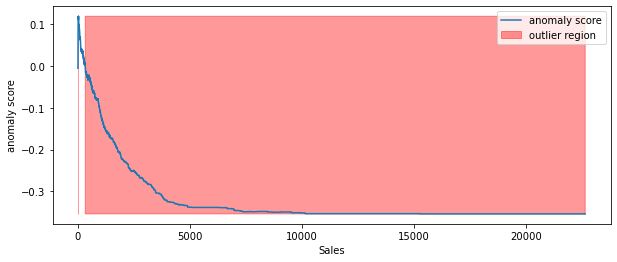

In [107]:
plt.figure(figsize=(10,4))
plt.plot(xx,anomaly_score,label ="anomaly score")
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                where=outlier ==-1, color ="r",
                alpha=.4,label ="outlier region")
plt.legend()
plt.ylabel("anomaly score")
plt.xlabel('Sales')                 
plt.show();

In [108]:
df.iloc[10]

Row ID                                                 11
Order ID                                   CA-2014-115812
Order Date                            2014-06-09 00:00:00
Ship Date                             2014-06-14 00:00:00
Ship Mode                                  Standard Class
Customer ID                                      BH-11710
Customer Name                             Brosina Hoffman
Segment                                          Consumer
Country                                     United States
City                                          Los Angeles
State                                          California
Postal Code                                         90032
Region                                               West
Product ID                                FUR-TA-10001539
Category                                        Furniture
Sub-Category                                       Tables
Product Name     Chromcraft Rectangular Conference Tables
Sales         

In [109]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Profit'].values.reshape(-1,1))
xx =np.linspace(df['Profit'].min(),df['Profit'].max(),len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
print(anomaly_score)
print(outlier)

[-0.31189149 -0.31189149 -0.31189149 ... -0.35357557 -0.35357557
 -0.35357557]
[-1 -1 -1 ... -1 -1 -1]


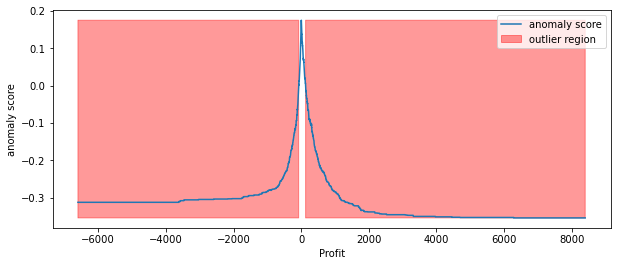

In [110]:
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label ="anomaly score")
plt.fill_between(xx.T[0], np.min(anomaly_score) , np.max(anomaly_score),
                 where = outlier==-1, color="r",
                 alpha=.4, label="outlier region")
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show()
                                                         

In [111]:
df.iloc[3]

Row ID                                                       4
Order ID                                        US-2015-108966
Order Date                                 2015-10-11 00:00:00
Ship Date                                  2015-10-18 00:00:00
Ship Mode                                       Standard Class
Customer ID                                           SO-20335
Customer Name                                   Sean O'Donnell
Segment                                               Consumer
Country                                          United States
City                                           Fort Lauderdale
State                                                  Florida
Postal Code                                              33311
Region                                                   South
Product ID                                     FUR-TA-10000577
Category                                             Furniture
Sub-Category                                           

In [112]:
df.iloc[1]

Row ID                                                           2
Order ID                                            CA-2016-152156
Order Date                                     2016-11-08 00:00:00
Ship Date                                      2016-11-11 00:00:00
Ship Mode                                             Second Class
Customer ID                                               CG-12520
Customer Name                                          Claire Gute
Segment                                                   Consumer
Country                                              United States
City                                                     Henderson
State                                                     Kentucky
Postal Code                                                  42420
Region                                                       South
Product ID                                         FUR-CH-10000454
Category                                                 Furni

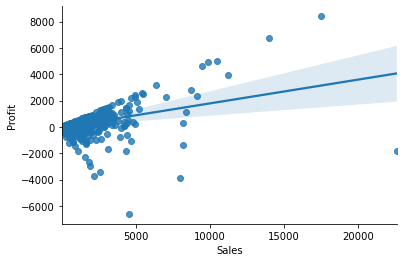

In [113]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [114]:
cols = ["Sales","Profit"]
df[cols].head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [115]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [116]:
minmax = MinMaxScaler(feature_range=(0,1))
df[['Sales','Profit']] = minmax.fit_transform(df[['Sales','Profit']])
df[['Sales','Profit']].head()

,Sales,Profit
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


In [117]:
X1 = df['Sales'].values.reshape(-1,1)
X2 = df['Profit'].values.reshape(-1,1)
X = np.concatenate((X1,X2),axis=1)

In [118]:
X                                   

array([[0.01155206, 0.44279413],
       [0.0323127 , 0.45463873],
       [0.0006262 , 0.44045798],
       ...,
       [0.01140258, 0.44129277],
       [0.00128792, 0.44088789],
       [0.0107216 , 0.4448631 ]])

#### Isolation Forest

#### Isolation Forest is similar to random forest and is built on the basis of decision tree. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximim and minimum values of selected feature

Outliers:  100  INLINERS:  9894


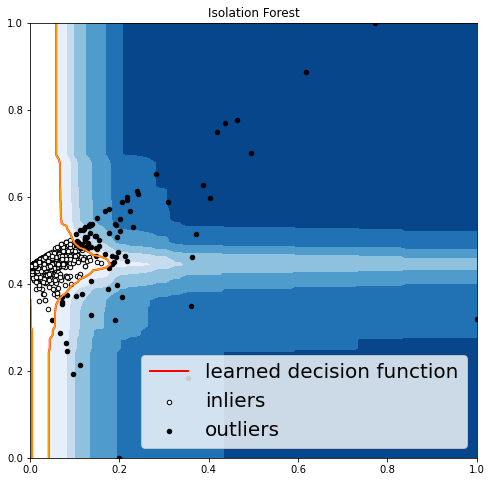

In [119]:
outlier_fraction = 0.01
xx, yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
clf = IForest(contamination = outlier_fraction,random_state =0)
clf.fit(X)
## predict raw anomaly score
scored_pred = clf.decision_function(X) *-1

##  prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliners = len(y_pred) - np.count_nonzero(y_pred) 
n_outliers = np.count_nonzero(y_pred ==1)
plt.figure(figsize =(8,8))
## copy of dataframe 
df1 = df                    
df1['outliers'] = y_pred.tolist()  
## sales - inliers feature 1, profit - inlier feature2

inliners_sales = np.array(df1['Sales'][df1['outliers']==0]) .reshape(-1,1)
inliners_profit  = np.array(df1['Profit'][df1['outliers']==0]).reshape(-1 ,1)
## sales - outlier feature1 , profit - outlier feature 2

outliers_sales = df1['Sales'][df1['outliers']==1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outliers']==1].values.reshape(-1,1)
print('Outliers: ',n_outliers, " INLINERS: ",n_inliners) 
# threshold value to consider a datapoint inlier or outlier 
threshold = percentile(scored_pred , 100* outlier_fraction)
 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) *-1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
# draw red contour line where anomaly score is equal to thresold

a = plt.contour(xx,yy,Z,levels=[threshold],linewidths=2, colors="red")
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contour(xx , yy, Z, levels=[threshold, Z.max()],colors= 'orange')
b = plt.scatter(inliners_sales, inliners_profit, c="white",s =20,edgecolor="k")
c = plt.scatter(outliers_sales, outliers_profit, c="black", s=20 ,edgecolor="k")
plt.axis('tight')
plt.legend([a.collections[0],b,c],['learned decision function', 'inliers','outliers'],prop = matplotlib.font_manager.FontProperties(size=20),loc='lower right') 
plt.xlim((0,1))
plt.ylim((0,1))
plt.title('Isolation Forest') 
plt.show();